In [4]:


import pandas as pd
import numpy as np
import random, time



def load_distance_matrix_from_excel(path, sheet_name):
    df_raw = pd.read_excel(path, sheet_name=sheet_name)
    first_col = df_raw.columns[0]
    df = df_raw.rename(columns={first_col: "node"}).set_index("node")
    df = df.loc[:, ~df.columns.astype(str).str.contains("Unnamed")]
    df = df.astype(float)
    np.fill_diagonal(df.values, 0.0)
    return df.to_numpy(), df.index.to_list()

def tour_length(tour, dist):
    total = 0.0
    n = len(tour)
    for k in range(n):
        i = tour[k]
        j = tour[(k+1) % n]
        total += dist[i, j]
    return total

def aco_tsp(dist, num_ants=30, num_iterations=200, alpha=1.0, beta=5.0, rho=0.5, q=100.0, seed=42, verbose=False):
    random.seed(seed)
    np.random.seed(seed)
    n = dist.shape[0]
    eta = np.divide(1.0, dist, out=np.zeros_like(dist), where=dist!=0)
    tau = np.ones_like(dist) * 0.1
    best_tour, best_cost = None, float("inf")

    for it in range(num_iterations):
        all_tours, all_costs = [], []
        for ant in range(num_ants):
            start = random.randrange(n)
            tour, unvisited = [start], set(range(n)) - {start}
            while unvisited:
                i = tour[-1]
                nodes = list(unvisited)
                probs = np.array([(tau[i,j]**alpha)*(eta[i,j]**beta) for j in nodes])
                probs = probs / probs.sum() if probs.sum() > 0 else np.ones(len(nodes))/len(nodes)
                j_next = random.choices(nodes, weights=probs, k=1)[0]
                tour.append(j_next)
                unvisited.remove(j_next)
            L = tour_length(tour, dist)
            all_tours.append(tour)
            all_costs.append(L)
            if L < best_cost:
                best_cost, best_tour = L, tour[:]
        tau = (1-rho)*tau
        for t, L in zip(all_tours, all_costs):
            delta = q/L if L>0 else 0
            for i in range(n):
                a, b = t[i], t[(i+1)%n]
                tau[a,b] += delta
                tau[b,a] += delta
        if verbose and (it%50==0 or it==num_iterations-1):
            print(f"Iter {it}: mejor = {best_cost:.4f}")
    return best_tour, best_cost



path_excel = "matrices_40.xlsx"  # asegúrate de subir este archivo en Colab
sheets = [f"Instancia_{i}" for i in range(1, 11)]
results = []

for sheet in sheets:
    print(f"\n Ejecutando ACO para {sheet}...")
    dist, labels = load_distance_matrix_from_excel(path_excel, sheet)
    start = time.time()
    best_tour, best_cost = aco_tsp(dist, num_ants=30, num_iterations=200, alpha=1.0, beta=5.0, rho=0.5, q=100.0, seed=42)
    elapsed = time.time() - start

    results.append({
        "Instancia": sheet,
        "Nodos": len(labels),
        "Mejor distancia": best_cost,
        "Tiempo (s)": elapsed
    })



df_results = pd.DataFrame(results)
print("\n===== RESULTADOS FINALES ACO =====")
print(df_results)

# (opcional: guardar en Excel o CSV)
df_results.to_excel("resultados_aco.xlsx", index=False)
print("\nArchivo 'resultados_aco.xlsx' guardado con éxito ✅")



🚀 Ejecutando ACO para Instancia_1...

🚀 Ejecutando ACO para Instancia_2...

🚀 Ejecutando ACO para Instancia_3...

🚀 Ejecutando ACO para Instancia_4...

🚀 Ejecutando ACO para Instancia_5...

🚀 Ejecutando ACO para Instancia_6...

🚀 Ejecutando ACO para Instancia_7...

🚀 Ejecutando ACO para Instancia_8...

🚀 Ejecutando ACO para Instancia_9...

🚀 Ejecutando ACO para Instancia_10...

===== RESULTADOS FINALES ACO =====
      Instancia  Nodos  Mejor distancia  Tiempo (s)
0   Instancia_1     40       132.943020    6.896509
1   Instancia_2     40         1.392862    7.953592
2   Instancia_3     40         0.947375    6.850949
3   Instancia_4     40       133.109381    7.951181
4   Instancia_5     40        33.938012   10.702450
5   Instancia_6     40         0.993581    6.942343
6   Instancia_7     40        34.047929    8.083408
7   Instancia_8     40         1.052377    7.946647
8   Instancia_9     40         1.331572    6.805114
9  Instancia_10     40         0.983911    7.986186

Archivo 'r

In [6]:
# 100 nodos

path_excel = "matrices_100.xlsx"
sheets = [f"Instancia_{i}" for i in range(1, 11)]
results = []

for sheet in sheets:
    print(f"\n🚀 Ejecutando ACO para {sheet}...")
    dist, labels = load_distance_matrix_from_excel(path_excel, sheet)
    start = time.time()
    best_tour, best_cost = aco_tsp(dist, num_ants=30, num_iterations=200, alpha=1.0, beta=5.0, rho=0.5, q=100.0, seed=42)
    elapsed = time.time() - start

    results.append({
        "Instancia": sheet,
        "Nodos": len(labels),
        "Mejor distancia": best_cost,
        "Tiempo (s)": elapsed
    })


df_results = pd.DataFrame(results)
print("\n===== RESULTADOS FINALES ACO =====")
print(df_results)

df_results.to_excel("resultados_aco_100.xlsx", index=False)
print("\nArchivo 'resultados_aco_100.xlsx' guardado con éxito ✅")


🚀 Ejecutando ACO para Instancia_1...


KeyboardInterrupt: 

In [7]:
#150 nodos

path_excel = "matrices_150.xlsx"  # asegúrate de subir este archivo en Colab
sheets = [f"Instancia_{i}" for i in range(1, 11)]
results = []

for sheet in sheets:
    print(f"\n🚀 Ejecutando ACO para {sheet}...")
    dist, labels = load_distance_matrix_from_excel(path_excel, sheet)
    start = time.time()
    best_tour, best_cost = aco_tsp(dist, num_ants=30, num_iterations=200, alpha=1.0, beta=5.0, rho=0.5, q=100.0, seed=42)
    elapsed = time.time() - start

    results.append({
        "Instancia": sheet,
        "Nodos": len(labels),
        "Mejor distancia": best_cost,
        "Tiempo (s)": elapsed
    })


df_results = pd.DataFrame(results)
print("\n===== RESULTADOS FINALES ACO =====")
print(df_results)

df_results.to_excel("resultados_aco_150.xlsx", index=False)
print("\nArchivo 'resultados_aco_150.xlsx' guardado con éxito ✅")


🚀 Ejecutando ACO para Instancia_1...

🚀 Ejecutando ACO para Instancia_2...

🚀 Ejecutando ACO para Instancia_3...

🚀 Ejecutando ACO para Instancia_4...

🚀 Ejecutando ACO para Instancia_5...

🚀 Ejecutando ACO para Instancia_6...

🚀 Ejecutando ACO para Instancia_7...

🚀 Ejecutando ACO para Instancia_8...

🚀 Ejecutando ACO para Instancia_9...

🚀 Ejecutando ACO para Instancia_10...

===== RESULTADOS FINALES ACO =====
      Instancia  Nodos  Mejor distancia  Tiempo (s)
0   Instancia_1    150       134.476181   77.784870
1   Instancia_2    150         2.448973   77.226481
2   Instancia_3    150         2.355874   77.357888
3   Instancia_4    150       145.285057   78.331530
4   Instancia_5    150       134.557333   78.297301
5   Instancia_6    150         2.856439   81.149159
6   Instancia_7    150         1.998635   81.208757
7   Instancia_8    150       134.421484   79.596402
8   Instancia_9    150       134.507892   79.375632
9  Instancia_10    150         2.760573   78.668573

Archivo 'r

In [ ]:


path_excel = "matrices_200.xlsx"  # asegúrate de subir este archivo en Colab
sheets = [f"Instancia_{i}" for i in range(1, 11)]
results = []

for sheet in sheets:
    print(f"\n🚀 Ejecutando ACO para {sheet}...")
    dist, labels = load_distance_matrix_from_excel(path_excel, sheet)
    start = time.time()
    best_tour, best_cost = aco_tsp(dist, num_ants=30, num_iterations=200, alpha=1.0, beta=5.0, rho=0.5, q=100.0, seed=42)
    elapsed = time.time() - start

    results.append({
        "Instancia": sheet,
        "Nodos": len(labels),
        "Mejor distancia": best_cost,
        "Tiempo (s)": elapsed
    })



df_results = pd.DataFrame(results)
print("\n===== RESULTADOS FINALES ACO =====")
print(df_results)

# (opcional: guardar en Excel o CSV)
df_results.to_excel("resultados_aco_200.xlsx", index=False)
print("\nArchivo 'resultados_aco200.xlsx' guardado con éxito ✅")

# Análisis

Resumen de tiempos promedio por tamaño de red:


,Tamaño instancia,Tiempo promedio (s)
0,40 nodos,7.811838
1,100 nodos,34.745766
2,150 nodos,78.899659
3,200 nodos,124.554042


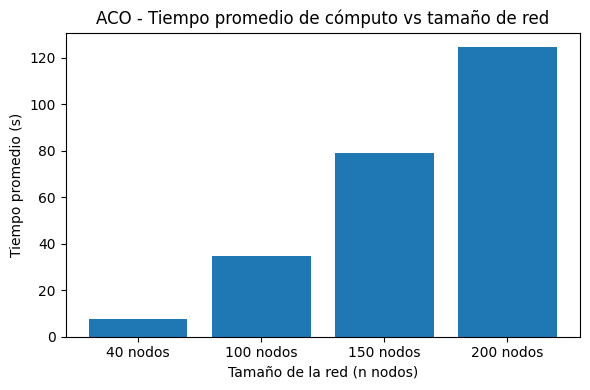

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


files_dict = {
    "40 nodos":  "resultados_aco.xlsx",
    "100 nodos": "resultados_aco_100.xlsx",
    "150 nodos": "resultados_aco_150.xlsx",
    "200 nodos": "resultados_aco_200.xlsx",
}

result_rows = []

for label, fname in files_dict.items():
    try:
        df = pd.read_excel(fname)
    except:
        df = pd.read_csv(fname)

    # promedio del tiempo
    mean_time = df["Tiempo (s)"].mean()

    result_rows.append({
        "Tamaño instancia": label,
        "Tiempo promedio (s)": mean_time
    })

resumen_df = pd.DataFrame(result_rows)

print("Resumen de tiempos promedio por tamaño de red:")
display(resumen_df)

plt.figure(figsize=(6,4))
plt.bar(
    resumen_df["Tamaño instancia"],
    resumen_df["Tiempo promedio (s)"]
)
plt.title("ACO - Tiempo promedio de cómputo vs tamaño de red")
plt.xlabel("Tamaño de la red (n nodos)")
plt.ylabel("Tiempo promedio (s)")
plt.tight_layout()
plt.show()


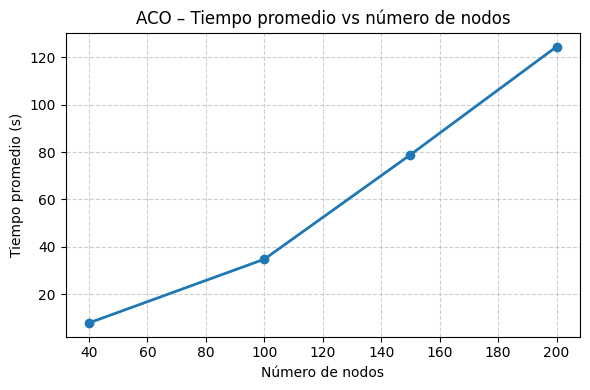

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Archivos con los resultados
files_dict = {
    "40":  "resultados_aco.xlsx",
    "100": "resultados_aco_100.xlsx",
    "150": "resultados_aco_150.xlsx",
    "200": "resultados_aco_200.xlsx",
}

data = []
for label, fname in files_dict.items():
    df = pd.read_excel(fname)
    mean_time = df["Tiempo (s)"].mean()
    data.append({"Nodos": int(label), "Tiempo promedio (s)": mean_time})

df_summary = pd.DataFrame(data).sort_values("Nodos")

plt.figure(figsize=(6,4))
plt.plot(df_summary["Nodos"], df_summary["Tiempo promedio (s)"], marker="o", linewidth=2)
plt.title("ACO – Tiempo promedio vs número de nodos")
plt.xlabel("Número de nodos")
plt.ylabel("Tiempo promedio (s)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
plt.plot(range(len(hist)), hist, color="purple", linewidth=2)
plt.title("Convergencia del algoritmo ACO")
plt.xlabel("Iteraciones")
plt.ylabel("Mejor distancia encontrada")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


NameError: name 'hist' is not defined

<Figure size 600x400 with 0 Axes>